In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Conv1D, Bidirectional, GRU, Dense, Flatten

In [ ]:

df = pd.read_csv('SBIN_NS_l.csv')

# Drop unnecessary columns
df.drop(columns=["SO", "EMA"], inplace=True)

# Convert Date to datetime
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")
df.set_index("Date", inplace=True)

# Scale data
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)


In [ ]:



# Prepare sequences
def create_sequences(data, target, sequence_length=60):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i : i + sequence_length])
        y.append(target[i + sequence_length])
    return np.array(X), np.array(y)

# Define features and target
sequence_length = 60
target_column = "CloseNext"
features = df_scaled.columns[df_scaled.columns != target_column]
X, y = create_sequences(df_scaled[features].values, df_scaled[target_column].values, sequence_length)


In [ ]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:

# LSTM Model
def train_lstm():
    model = Sequential([
        LSTM(50, activation="relu", return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        LSTM(50, activation="relu"),
        Dense(25, activation="relu"),
        Dense(1)
    ])
    model.compile(optimizer="adam", loss="mse")
    model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)
    return model

# ConvLSTM Model
def train_convlstm():
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
        Flatten(),
        Dense(25, activation="relu"),
        Dense(1)
    ])
    model.compile(optimizer="adam", loss="mse")
    model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)
    return model

# BiLSTM Model
def train_bilstm():
    model = Sequential([
        Bidirectional(LSTM(50, activation="relu", return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
        Bidirectional(LSTM(50, activation="relu")),
        Dense(25, activation="relu"),
        Dense(1)
    ])
    model.compile(optimizer="adam", loss="mse")
    model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)
    return model

# GRU Model
def train_gru():
    model = Sequential([
        GRU(50, activation="relu", return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        GRU(50, activation="relu"),
        Dense(25, activation="relu"),
        Dense(1)
    ])
    model.compile(optimizer="adam", loss="mse")
    model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)
    return model


In [ ]:
'''
# Prediction function
def predict_future(model, X_test, days=60):
    predictions = []
    last_sequence = X_test[-1]
    for _ in range(days):
        pred = model.predict(last_sequence.reshape(1, sequence_length, len(features)))[0]
        predictions.append(pred)
        last_sequence = np.roll(last_sequence, -1, axis=0)
        last_sequence[-1] = np.append(last_sequence[-1, :-1], pred)
    return scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

'''

# Predict future 2 months (approx 60 days)
def predict_future(model, X_test, days=60):
    predictions = []
    last_sequence = X_test[-1]
    for _ in range(days):
        pred = model.predict(last_sequence.reshape(1, sequence_length, len(features)))[0]
        predictions.append(pred)
        last_sequence = np.roll(last_sequence, -1, axis=0)
        last_sequence[-1] = np.append(last_sequence[-1, :-1], pred)  # Update last sequence

    num_features = X_test.shape[2]  # Correct number of features after dropping SO and EMA
    dummy_features = np.zeros((len(predictions), scaler.n_features_in_ - 1))  # Adjust for missing features
    scaled_predictions = np.hstack((dummy_features, np.array(predictions).reshape(-1, 1)))  # Combine
    return scaler.inverse_transform(scaled_predictions)[:, -1]  # Extract only the last column



In [ ]:
lstm_model = train_lstm()

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - loss: 0.0196 - val_loss: 0.0739
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 6.8497e-04 - val_loss: 0.0042
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 5.6153e-04 - val_loss: 0.0023
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 4.6213e-04 - val_loss: 0.0010
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 3.6868e-04 - val_loss: 0.0032
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 3.8166e-04 - val_loss: 0.0016
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 4.1447e-04 - val_loss: 0.0010
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 3.2549e-04 - val_loss: 8.6711e-04
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 3.3786e-04 - val_loss: 8.8289e-04
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 3.6350e-04 - val_loss: 8.7991e-04
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 3.1054e-04 - val_loss: 8.8142e-04
Epoch 12/20
62/62 

In [ ]:
convlstm_model = train_convlstm()


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0084 - val_loss: 0.0034
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.2973e-04 - val_loss: 0.0016
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.8721e-04 - val_loss: 0.0014
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.5726e-04 - val_loss: 0.0016
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7384e-04 - val_loss: 0.0031
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9397e-04 - val_loss: 0.0012
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.5692e-04 - val_loss: 0.0016
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1064e-04 - val_loss: 0.0024
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.3344e-04 - val_loss: 0.0016
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.2461e-04 - val_loss: 0.0011
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.6601e-04 - val_loss: 0.0011
Epoch 12/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 6m

In [ ]:
bilstm_model = train_bilstm()


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 135ms/step - loss: 0.0167 - val_loss: 0.0064
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - loss: 5.6924e-04 - val_loss: 0.0018
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - loss: 3.9307e-04 - val_loss: 0.0013
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - loss: 3.7091e-04 - val_loss: 0.0010
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - loss: 2.8992e-04 - val_loss: 0.0010
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - loss: 2.5698e-04 - val_loss: 0.0011
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 141ms/step - loss: 2.5015e-04 - val_loss: 0.0017
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - loss: 2.5579e-04 - val_loss: 0.0024
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - loss: 2.1875e-04 - val_loss: 8.3768e-04
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - loss: 2.4587e-04 - val_loss: 0.0017
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - loss: 2.2775e-04 - val_loss: 0.0033
Epoch 12/20
6

In [ ]:
gru_model = train_gru()

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - loss: 0.0146 - val_loss: 0.0038
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 3.6533e-04 - val_loss: 9.5903e-04
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - loss: 2.5900e-04 - val_loss: 6.5141e-04
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 2.3832e-04 - val_loss: 7.2039e-04
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 2.1710e-04 - val_loss: 7.0431e-04
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - loss: 2.2357e-04 - val_loss: 6.3568e-04
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - loss: 2.2837e-04 - val_loss: 0.0013
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 2.0775e-04 - val_loss: 9.4442e-04
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 2.2029e-04 - val_loss: 9.5438e-04
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 1.9632e-04 - val_loss: 0.0012
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 1.8047e-04 - val_loss: 

In [ ]:
'''

# Model training function
def create_and_train_model(model_type, X_train, y_train, X_test, y_test, epochs=20, batch_size=32):
    model = Sequential()

    if model_type == "LSTM":
        model.add(LSTM(50, activation="relu", return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
        model.add(LSTM(50, activation="relu"))
    elif model_type == "ConvLSTM":
        model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
        model.add(Flatten())
    elif model_type == "BiLSTM":
        model.add(Bidirectional(LSTM(50, activation="relu", return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
        model.add(Bidirectional(LSTM(50, activation="relu")))
    elif model_type == "GRU":
        model.add(GRU(50, activation="relu", return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
        model.add(GRU(50, activation="relu"))

    model.add(Dense(25, activation="relu"))
    model.add(Dense(1))

    model.compile(optimizer="adam", loss="mse")
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)
    return model, history

# Train models
models = {}
histories = {}
for model_type in ["LSTM", "ConvLSTM", "BiLSTM", "GRU"]:
    print(f"Training {model_type} model...")
    models[model_type], histories[model_type] = create_and_train_model(model_type, X_train, y_train, X_test, y_test)


Training LSTM model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - loss: 0.0268 - val_loss: 0.0271
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 5.0764e-04 - val_loss: 0.0181
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 4.2816e-04 - val_loss: 0.0163
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 4.4928e-04 - val_loss: 0.0044
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 3.2862e-04 - val_loss: 0.0045
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 3.8789e-04 - val_loss: 0.0018
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 3.1449e-04 - val_loss: 0.0017
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 3.0270e-04 - val_loss: 0.0013
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 4.5467e-04 - val_loss: 0.0014
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 3.1879e-04 - val_loss: 0.0045
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 2.9480e-04 - val_loss: 0.0014
Epoch 12/20
62/62 ━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0182 - val_loss: 0.0040
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.4644e-04 - val_loss: 0.0039
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.0876e-04 - val_loss: 0.0021
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.8820e-04 - val_loss: 0.0021
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.3318e-04 - val_loss: 0.0026
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4376e-04 - val_loss: 0.0015
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.5874e-04 - val_loss: 0.0014
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.5415e-04 - val_loss: 0.0020
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.6913e-04 - val_loss: 0.0017
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.9425e-04 - val_loss: 0.0025
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.1766e-04 - val_loss: 0.0012
Epoch 12/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 114ms/step - loss: 0.0200 - val_loss: 9.3972
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - loss: 5.5608e-04 - val_loss: 0.0045
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - loss: 3.4190e-04 - val_loss: 0.0022
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - loss: 2.8223e-04 - val_loss: 0.0035
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - loss: 2.8446e-04 - val_loss: 0.0042
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - loss: 3.1463e-04 - val_loss: 0.0021
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 116ms/step - loss: 2.7709e-04 - val_loss: 0.0030
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - loss: 2.4301e-04 - val_loss: 0.0013
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - loss: 2.3525e-04 - val_loss: 0.0011
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 120ms/step - loss: 2.0036e-04 - val_loss: 0.0017
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - loss: 2.2899e-04 - val_loss: 0.0017
Epoch 12/20
62/6

ValueError: non-broadcastable output operand with shape (60,1) doesn't match the broadcast shape (60,8)

<Figure size 1200x600 with 0 Axes>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━

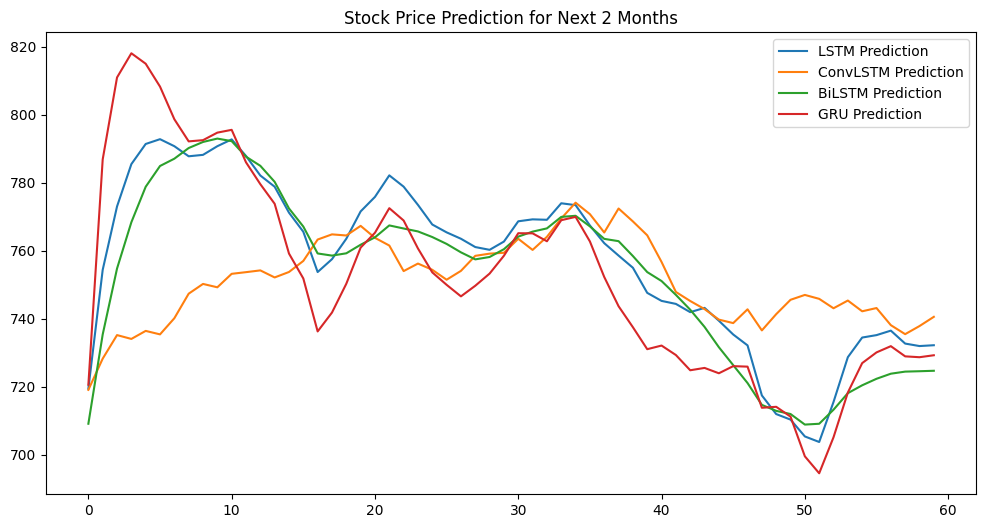

In [ ]:
'''
# Predict future 2 months (approx 60 days)
def predict_future(model, X_test, days=60):
    predictions = []
    last_sequence = X_test[-1]
    for _ in range(days):
        pred = model.predict(last_sequence.reshape(1, sequence_length, len(features)))[0]
        predictions.append(pred)
        last_sequence = np.roll(last_sequence, -1, axis=0)
        last_sequence[-1] = np.append(last_sequence[-1, :-1], pred)  # Update last sequence

    num_features = X_test.shape[2]  # Correct number of features after dropping SO and EMA
    dummy_features = np.zeros((len(predictions), scaler.n_features_in_ - 1))  # Adjust for missing features
    scaled_predictions = np.hstack((dummy_features, np.array(predictions).reshape(-1, 1)))  # Combine
    return scaler.inverse_transform(scaled_predictions)[:, -1]  # Extract only the last column



# Plot results
plt.figure(figsize=(12, 6))
for model_type, model in models.items():
    future_predictions = predict_future(model, X_test, days=60)
    plt.plot(range(len(future_predictions)), future_predictions, label=f"{model_type} Prediction")
plt.legend()
plt.title("Stock Price Prediction for Next 2 Months")
plt.show()


'''

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━

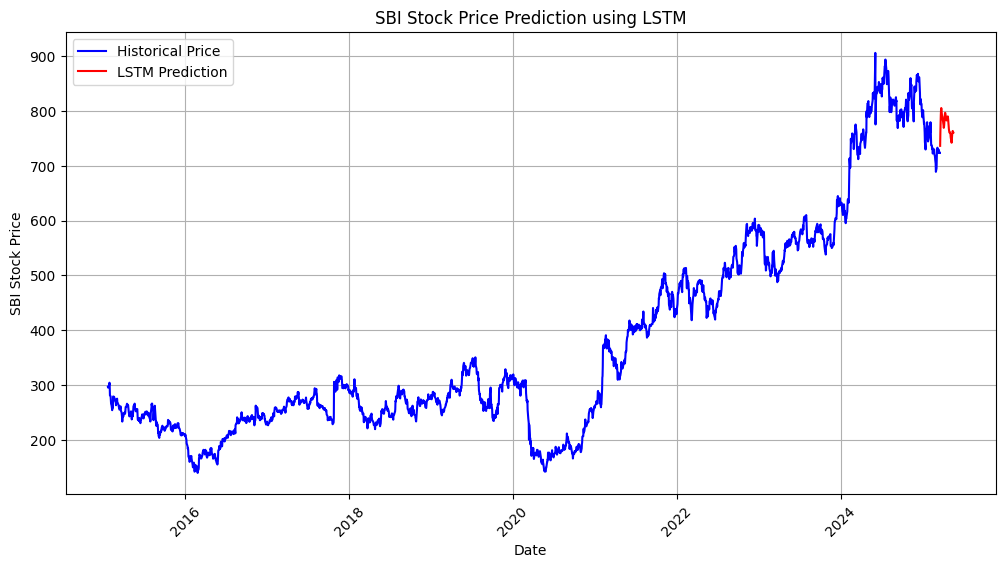

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━

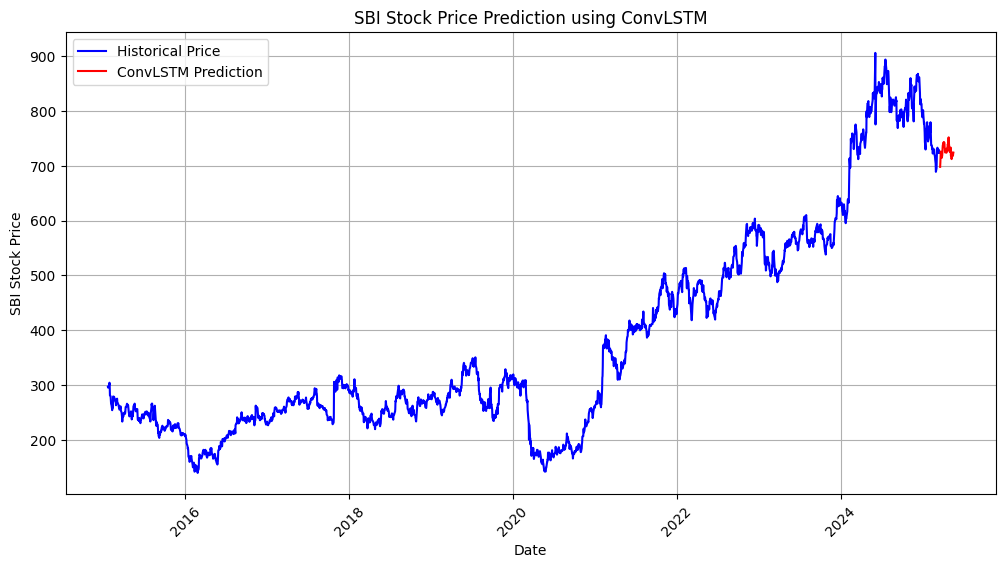

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━

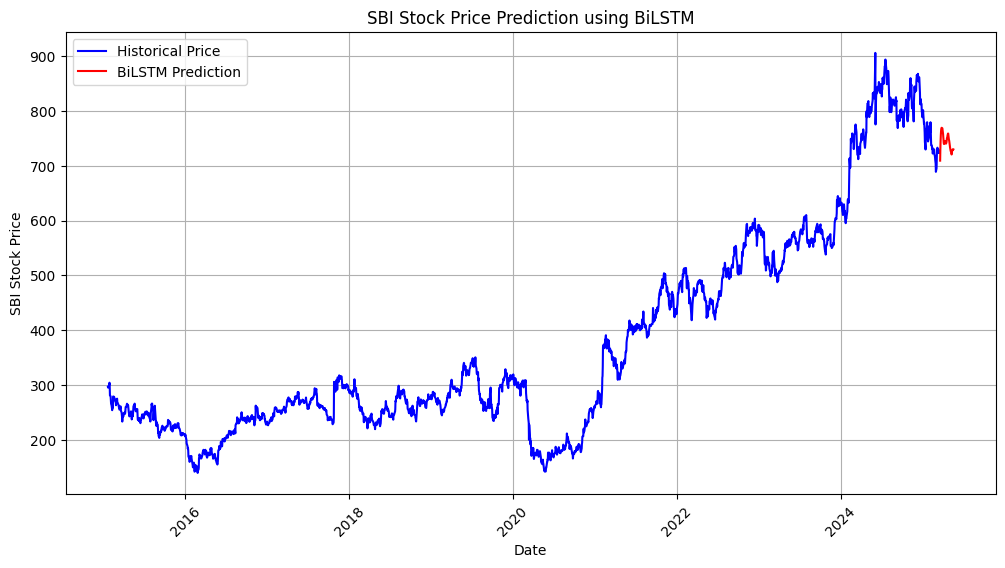

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━

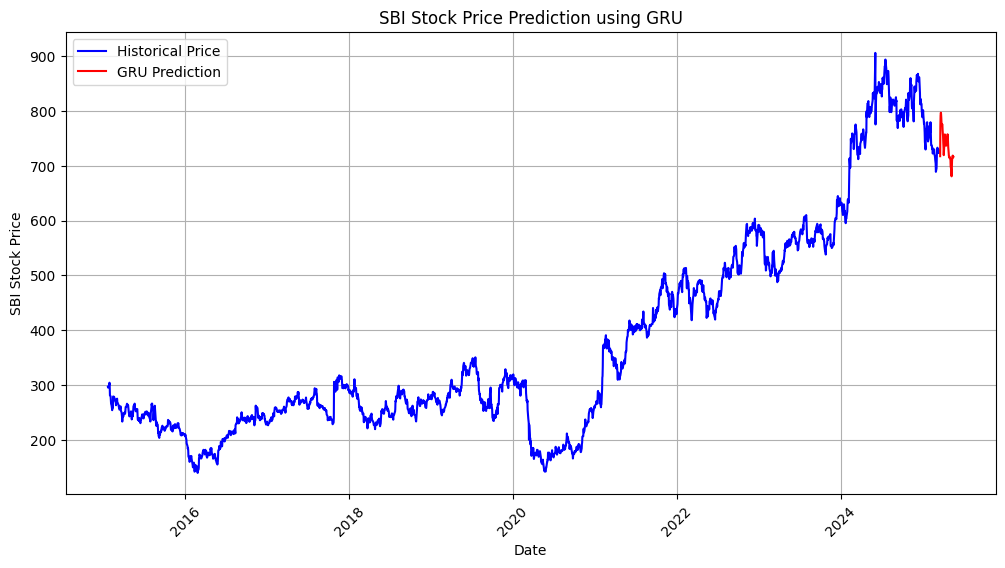

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

# Reset index to access 'Date' column
df = df.reset_index()

# Convert date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a dictionary for model names
model_names = {
    'LSTM': lstm_model,
    'ConvLSTM': convlstm_model,
    'BiLSTM': bilstm_model,
    'GRU': gru_model
}

# Generate predictions and plot separately for each model
for model_name, model in model_names.items():
    future_predictions = predict_future(model, X_test, days=60)  # Predict for 60 days

    # Create future date range
    future_dates = pd.date_range(start=df['Date'].iloc[-1], periods=61, freq='D')[1:]

    # Plot historical prices
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Close'], label="Historical Price", color='blue')

    # Plot predicted future prices
    plt.plot(future_dates, future_predictions, label=f"{model_name} Prediction", color='red')

    # Formatting
    plt.xlabel("Date")
    plt.ylabel("SBI Stock Price")
    plt.title(f"SBI Stock Price Prediction using {model_name}")
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid()

    # Show plot
    plt.show()


In [ ]:
def evaluate_model(model, X_test, y_test, scaler):
    predictions = model.predict(X_test)

    # Reshape y_test and predictions to match the expected shape
    y_test = y_test.reshape(-1, 1)
    predictions = predictions.reshape(-1, 1)

    # Apply inverse transform only to the target column
    y_test_inv = scaler.inverse_transform(np.concatenate([np.zeros((y_test.shape[0], scaler.n_features_in_ - 1)), y_test], axis=1))[:, -1]
    predictions_inv = scaler.inverse_transform(np.concatenate([np.zeros((predictions.shape[0], scaler.n_features_in_ - 1)), predictions], axis=1))[:, -1]

    # Compute metrics
    mae = mean_absolute_error(y_test_inv, predictions_inv)
    mse = mean_squared_error(y_test_inv, predictions_inv)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_inv, predictions_inv)
    mape = np.mean(np.abs((y_test_inv - predictions_inv) / y_test_inv)) * 100
    evs = explained_variance_score(y_test_inv, predictions_inv)

    # Calculate Sharpe Ratio (Assume risk-free rate is 0)
    excess_returns = predictions_inv - y_test_inv
    sharpe_ratio = np.mean(excess_returns) / np.std(excess_returns) if np.std(excess_returns) != 0 else np.nan

    # Print results
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print(f"MAPE: {mape:.4f}%")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
    print("-" * 50)


In [ ]:
# Evaluate all models separately
model_names = {
    "LSTM": lstm_model,
    "ConvLSTM": convlstm_model,
    "BiLSTM": bilstm_model,
    "GRU": gru_model
}

for model_name, model in model_names.items():
    print(f"Performance Metrics for {model_name}:")
    evaluate_model(model, X_test, y_test, scaler)  # Pass 'scaler' here


Performance Metrics for LSTM:
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
MAE: 17.5071
MSE: 501.0557
RMSE: 22.3843
R² Score: 0.9625
MAPE: 2.5061%
Explained Variance Score: 0.9658
Sharpe Ratio: 0.3072
--------------------------------------------------
Performance Metrics for ConvLSTM:
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
MAE: 40.8034
MSE: 2321.2995
RMSE: 48.1799
R² Score: 0.8265
MAPE: 5.6492%
Explained Variance Score: 0.9406
Sharpe Ratio: -1.3865
--------------------------------------------------
Performance Metrics for BiLSTM:
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step
MAE: 19.7993
MSE: 639.5409
RMSE: 25.2891
R² Score: 0.9522
MAPE: 2.7224%
Explained Variance Score: 0.9636
Sharpe Ratio: -0.5612
--------------------------------------------------
Performance Metrics for GRU:
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
MAE: 16.4474
MSE: 479.2426
RMSE: 21.8916
R² Score: 0.9642
MAPE: 2.2583%
Explained Variance Score: 0.9755
Sharpe Ratio: -0.6808
--------------------------------------------------


saving pickle file

In [ ]:
import pickle
# Save LSTM model
with open('lstm_model.pkl', 'wb') as file:
  pickle.dump(lstm_model, file)

   # Save ConvLSTM model
with open('convlstm_model.pkl', 'wb') as file:
  pickle.dump(convlstm_model, file)

   # Save BiLSTM model
with open('bilstm_model.pkl', 'wb') as file:
  pickle.dump(bilstm_model, file)

   # Save GRU model
with open('gru_model.pkl', 'wb') as file:
  pickle.dump(gru_model, file)

In [ ]:
# Save LSTM model
              with open('lstm_model.pkl', 'wb') as file:
                  pickle.dump(lstm_model, file)

              # Save ConvLSTM model
              with open('convlstm_model.pkl', 'wb') as file:
                  pickle.dump(convlstm_model, file)

              # Save BiLSTM model
              with open('bilstm_model.pkl', 'wb') as file:
                  pickle.dump(bilstm_model, file)

              # Save GRU model
              with open('gru_model.pkl', 'wb') as file:
                  pickle.dump(gru_model, file)

using saved file

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


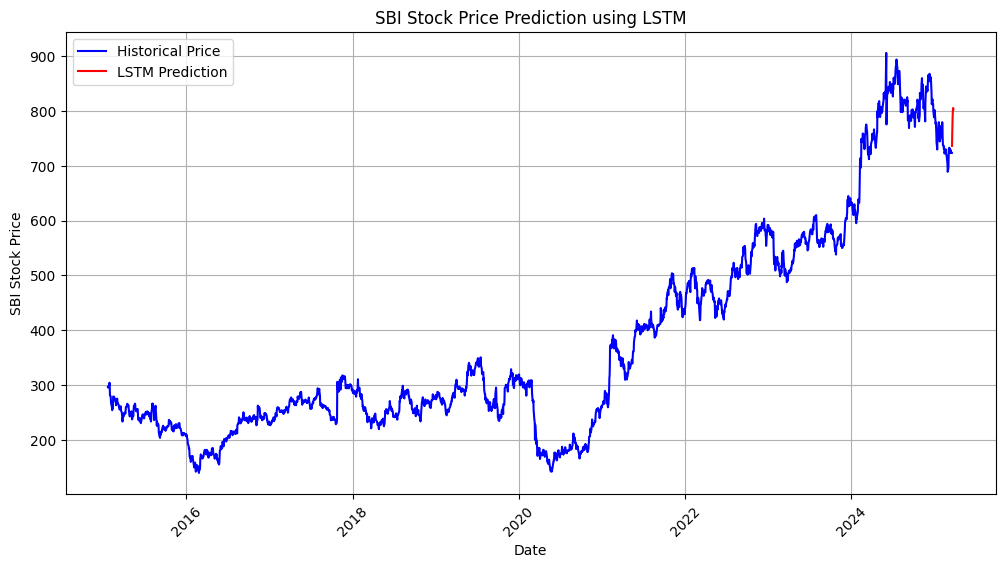

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


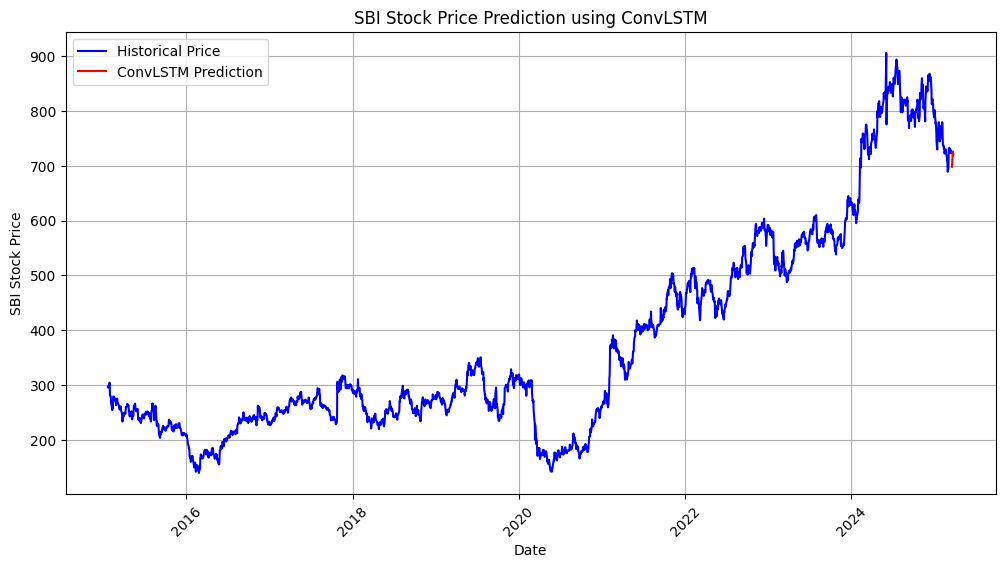

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


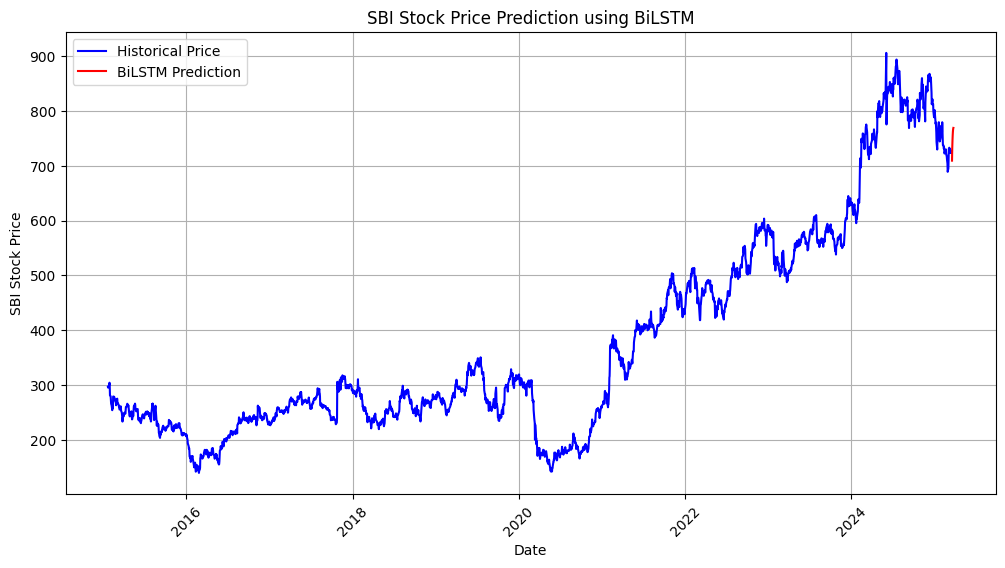

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


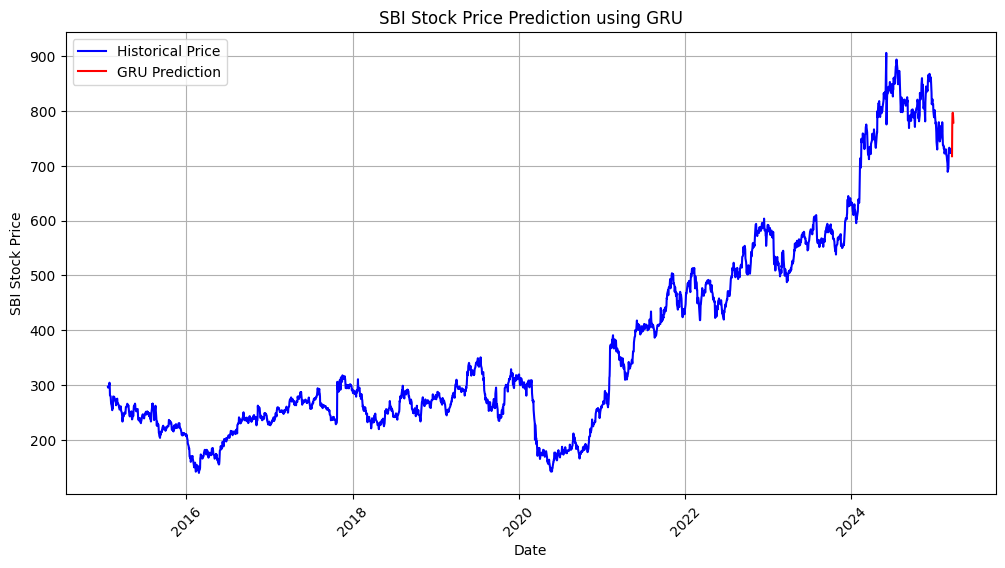

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

# Reset index to access 'Date' column
df = df.reset_index()

# Convert date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a dictionary for model names
model_names = {
    'LSTM': lstm_model,
    'ConvLSTM': convlstm_model,
    'BiLSTM': bilstm_model,
    'GRU': gru_model
}

# Generate predictions and plot separately for each model
for model_name, model in model_names.items():
    future_predictions = predict_future(model, X_test, days=7)  # Predict for 7 days

    # Create future date range for next 7 days
    future_dates = pd.date_range(start=df['Date'].iloc[-1], periods=8, freq='D')[1:]  # Change from 61 to 8

    # Plot historical prices
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Close'], label="Historical Price", color='blue')

    # Plot predicted future prices
    plt.plot(future_dates, future_predictions, label=f"{model_name} Prediction", color='red')

    # Formatting
    plt.xlabel("Date")
    plt.ylabel("SBI Stock Price")
    plt.title(f"SBI Stock Price Prediction using {model_name}")
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid()

    # Show plot
    plt.show()
